# ROSSMANN SALES Exploration of customer purchasing behavior

### importing the nessesary library

In [62]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import logging
os.chdir(r'c:\Users\ermias.tadesse\10x\Rossmann-Sales-Forecasting-ML\log')
# Configure logging
logging.basicConfig(filename='data_processing.log', 
                    level=logging.INFO, 
                    format='%(asctime)s:%(levelname)s:%(message)s')
print(os.getcwd())  # This prints the current working directory
os.chdir(r'c:\Users\ermias.tadesse\10x\Rossmann-Sales-Forecasting-ML')  # Set the working directory to the project root
from src.data_loader import DataLoader
os.chdir(r'c:\Users\ermias.tadesse\10x\Rossmann-Sales-Forecasting-ML')  # Set the working directory to the project root

c:\Users\ermias.tadesse\10x\Rossmann-Sales-Forecasting-ML\log


# Load and Pass the data to the class

In [63]:
data_loader = DataLoader(data_path='data')
train_data, test_data, store_data, sample_submission_data = data_loader.load_data()
logging.info("Loading train_data, test_data, store_data, and sample_submission_data.")

c:\Users\ermias.tadesse\10x\Rossmann-Sales-Forecasting-ML\src\data_loader.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  self.train = pd.read_csv(f"{self.data_path}/train.csv")


Data Loaded Successfully
Data Loaded Successfully


c:\Users\ermias.tadesse\10x\Rossmann-Sales-Forecasting-ML\scripts\exploration.py:16: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  self.train = pd.read_csv(f"{self.data_path}/train.csv")


# Initial Exploration to each data

In [64]:
data_loader.initial_exploration(train_data)

Shape of dataset: (1017209, 9)
Columns: Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')
First 5 rows:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [65]:
data_loader.initial_exploration(test_data)

Shape of dataset: (41088, 8)
Columns: Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')
First 5 rows:
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0


In [66]:
data_loader.initial_exploration(store_data)

Shape of dataset: (1115, 10)
Columns: Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
First 5 rows:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                

In [67]:
data_loader.initial_exploration(sample_submission_data)

Shape of dataset: (41088, 2)
Columns: Index(['Id', 'Sales'], dtype='object')
First 5 rows:
   Id  Sales
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0


# Check missing data for Traininga and store data

In [68]:
missing_data_train = data_loader.check_missing_data(train_data)

Missing Data in the Dataset:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [69]:
missing_data_test = data_loader.check_missing_data(test_data)

Missing Data in the Dataset:
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [70]:
missing_data_store = data_loader.check_missing_data(store_data)

Missing Data in the Dataset:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [71]:
missing_data_sample_submission = data_loader.check_missing_data(sample_submission_data)

Missing Data in the Dataset:
Id       0
Sales    0
dtype: int64


# 1. Check Promotion Distribution (Train vs Test)
### Since both the train and test datasets contain a 'Promo' column, we can compare the distribution of promotions as follows:

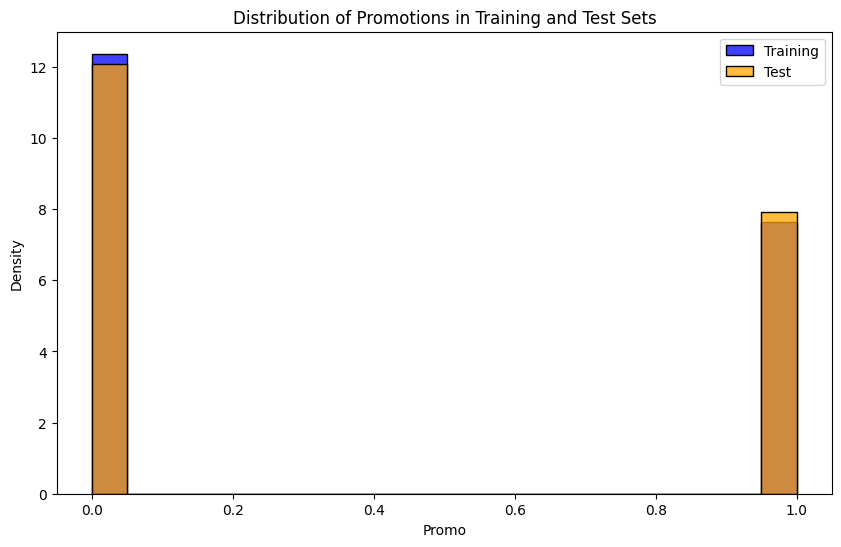

In [72]:
logging.info('Check distribution of promotions in both datasets')
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Promo'], label='Training', color='blue', kde=False, stat='density', bins=20)
sns.histplot(test_data['Promo'], label='Test', color='orange', kde=False, stat='density', bins=20)
plt.legend()
plt.title('Distribution of Promotions in Training and Test Sets')
plt.xlabel('Promo')
plt.ylabel('Density')
plt.show()
logging.info("Generating bar chart for promo distribution comparison between train and test sets.")


# 2. Sales Behavior Before, During, and After Holidays
### We need to define the holiday periods using the 'StateHoliday' column in train_data. Let's define 'before', 'during', and 'after' periods based on the holiday column.

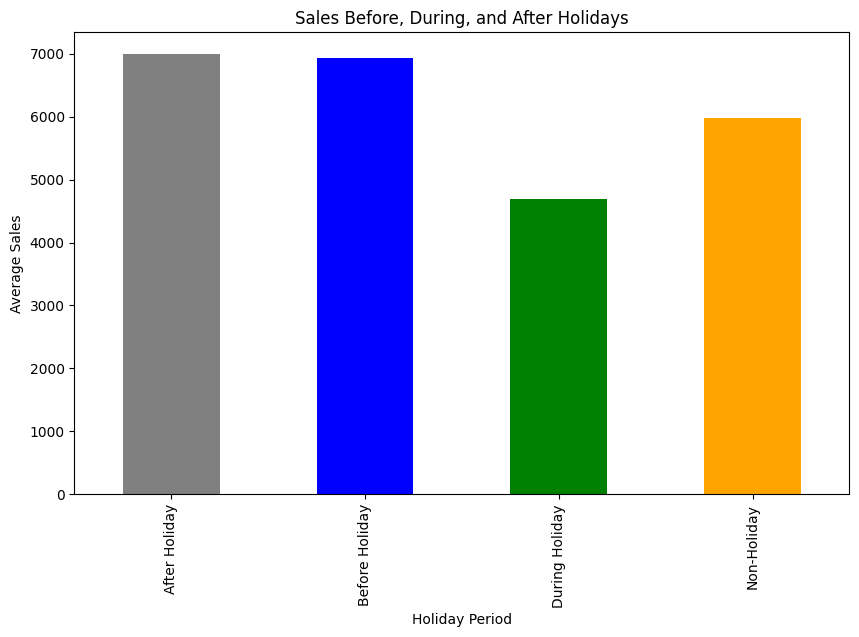

In [73]:
logging.info('Convert Date column to datetime')
train_data['Date'] = pd.to_datetime(train_data['Date'])

logging.info('Create Holiday flag where StateHoliday is not 0')
train_data['HolidayFlag'] = train_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

logging.info('Shift dates to create before and after holiday flags')
train_data['BeforeHoliday'] = train_data['HolidayFlag'].shift(1, fill_value=0)
train_data['AfterHoliday'] = train_data['HolidayFlag'].shift(-1, fill_value=0)

logging.info('Define a function to categorize the period')
def categorize_period(row):
    if row['HolidayFlag'] == 1:
        return 'During Holiday'
    elif row['BeforeHoliday'] == 1:
        return 'Before Holiday'
    elif row['AfterHoliday'] == 1:
        return 'After Holiday'
    else:
        return 'Non-Holiday'

logging.info('Apply categorization to create a new column')
train_data['HolidayPeriod'] = train_data.apply(categorize_period, axis=1)

logging.info('Group by the holiday period and calculate average sales')
holiday_sales = train_data.groupby('HolidayPeriod')['Sales'].mean()

logging.info('Plot sales trends')
holiday_sales.plot(kind='bar', figsize=(10, 6), color=['gray', 'blue', 'green', 'orange'])
plt.title('Sales Before, During, and After Holidays')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.show()

logging.info("Generating line plot for sales behavior before, during, and after holidays.")



# 3. Seasonal Purchase Behavior (Christmas, Easter, etc.)
### Given the StateHoliday column and its categories ('a', 'b', 'c', '0'), we can specifically track how sales behave during public holidays, Easter, and Christmas for the seasonal purchase behavior task.
#### You can check for seasonal behavior by grouping sales by month and analyzing peaks during key seasons like Christmas (December) and Easter (April).
### OR
#### Seasonal Purchase Behavior (Christmas, Easter, Public Holidays)
##### Let's focus on sales during different types of holidays as indicated by the StateHoliday column ('a', 'b', 'c').

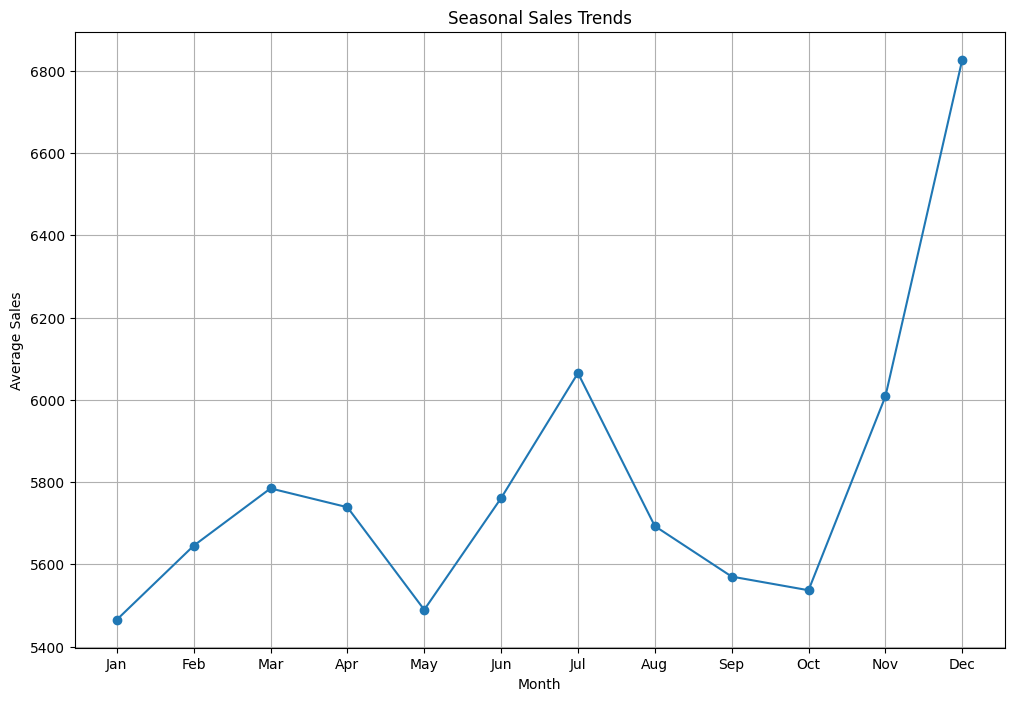

In [74]:
logging.info('Extract the month from the Date column')
train_data['Month'] = train_data['Date'].dt.month

logging.info('Group sales by month to analyze seasonal trends')
seasonal_sales = train_data.groupby('Month')['Sales'].mean()

logging.info('Plot seasonal sales trends')
seasonal_sales.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

### Average Sales During Different Types of Holidays

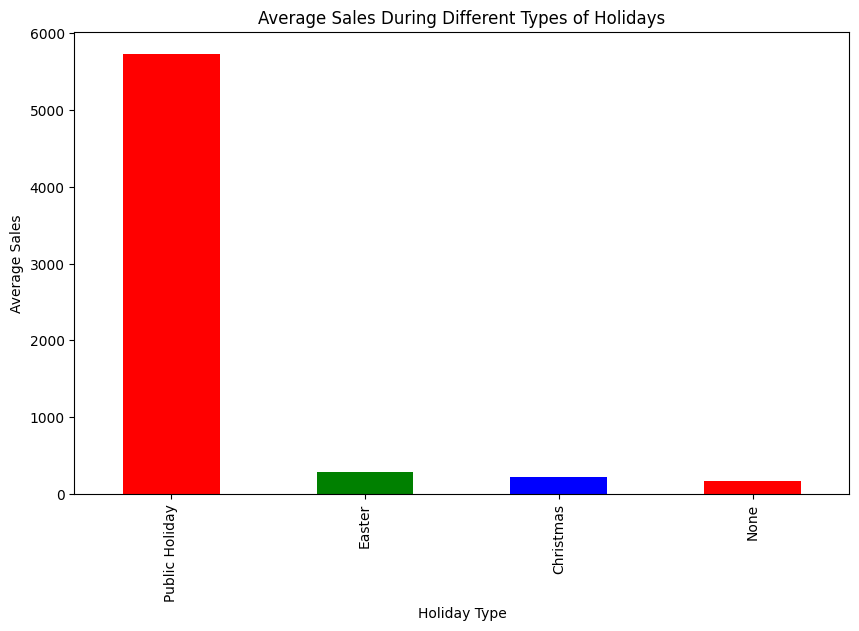

In [75]:
logging.info('Filter data for holidays')
holiday_sales = train_data[train_data['StateHoliday'] != '0']

logging.info('Group by the StateHoliday column to calculate average sales during each type of holiday')
holiday_type_sales = holiday_sales.groupby('StateHoliday')['Sales'].mean()

logging.info('Plot the sales by holiday type')
holiday_type_sales.plot(kind='bar', figsize=(10, 6), color=['red', 'green', 'blue'])
plt.title('Average Sales During Different Types of Holidays')
plt.xlabel('Holiday Type')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Public Holiday', 'Easter', 'Christmas', 'None'])
plt.show()

# 4. Correlation Between Sales and the Number of Customers
### This analysis will determine how customer volume relates to sales.

Correlation between Sales and Customers: 0.8947107733017018


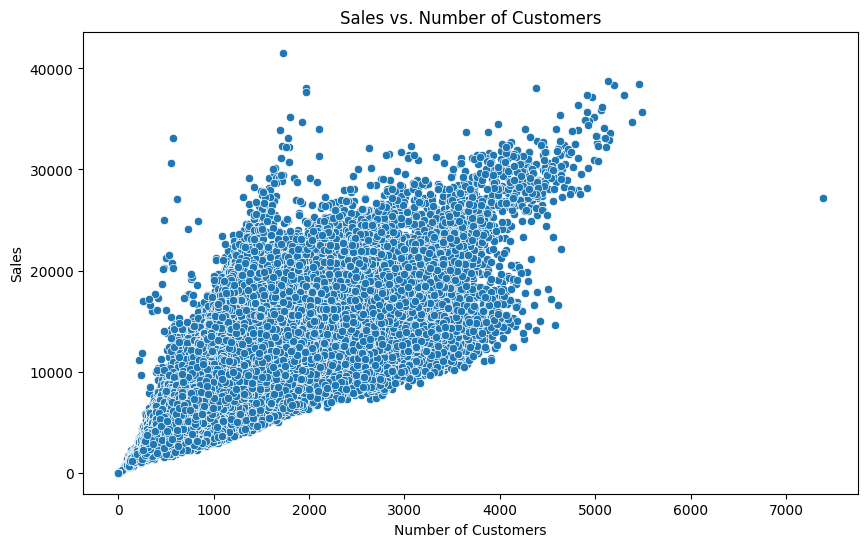

In [76]:
logging.info('Calculate the correlation between Sales and Customers')
correlation = train_data['Sales'].corr(train_data['Customers'])
print(f'Correlation between Sales and Customers: {correlation}')

logging.info('Scatter plot to visualize the relationship between Sales and Customers')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=train_data)
plt.title('Sales vs. Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

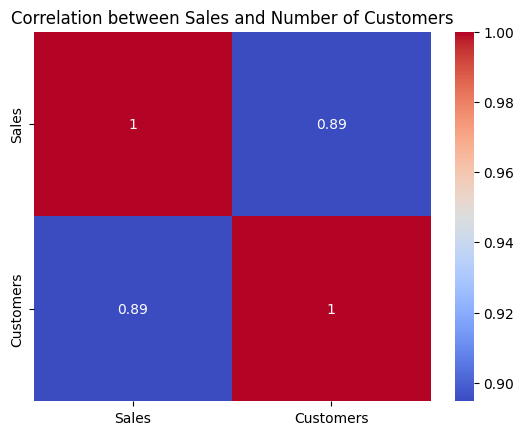

In [93]:
logging.info("Analyzing correlation between sales and number of customers...")
correlation = train_data[['Sales', 'Customers']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sales and Number of Customers')
plt.show()

# 5. Effect of Promo on Sales
### Next, let's check how promotions affect sales and whether they attract new customers or increase sales with existing customers.

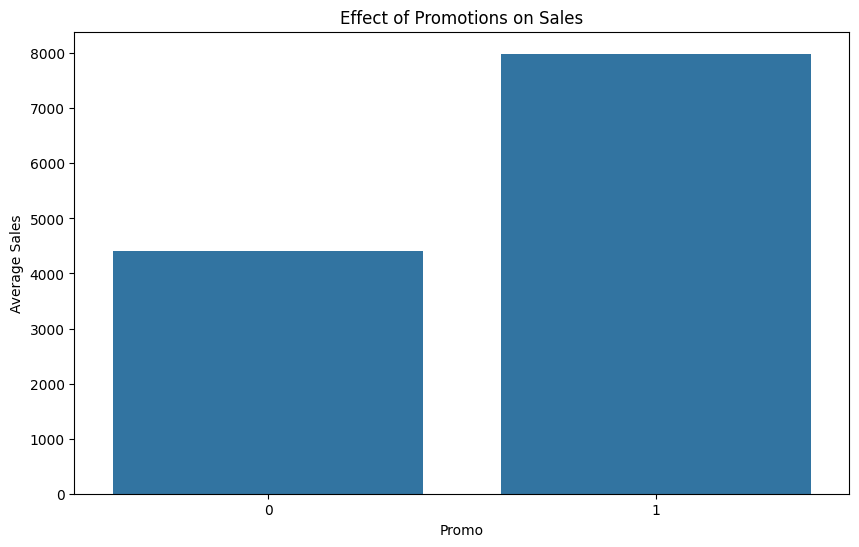

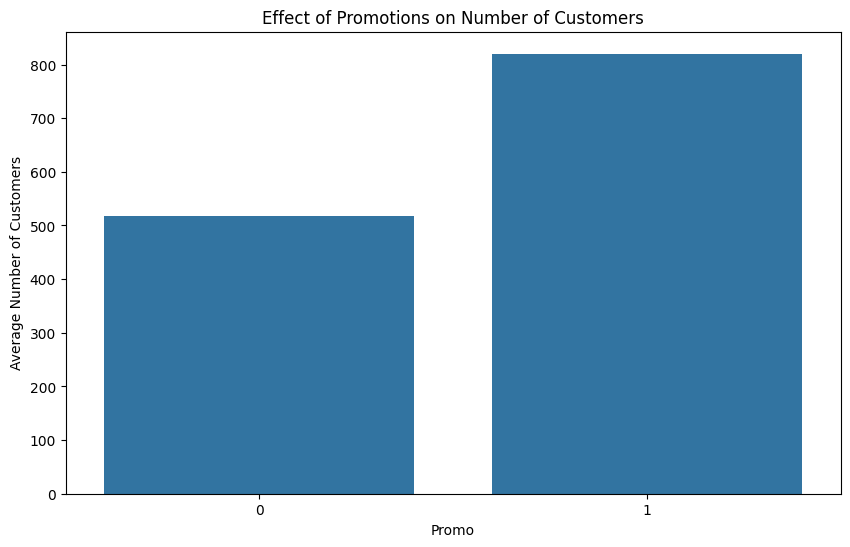

In [77]:
logging.info('Group by Promo and calculate the average sales and customers for stores with and without promo')
promo_effect = train_data.groupby('Promo').agg({'Sales': 'mean', 'Customers': 'mean'}).reset_index()

logging.info('Plot the effect of promotions on sales and customers')
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=promo_effect)
plt.title('Effect of Promotions on Sales')
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Customers', data=promo_effect)
plt.title('Effect of Promotions on Number of Customers')
plt.xlabel('Promo')
plt.ylabel('Average Number of Customers')
plt.show()


# 6. Effective Deployment of Promos: Which Stores Should Get More Promos?
### To determine which stores should receive more promos, we can analyze which stores are benefiting the most from promotions and which are not seeing significant increases in sales or customers.

Stores where promos are less effective:
Promo  Store  PromoEffect
273      274  -254.683906


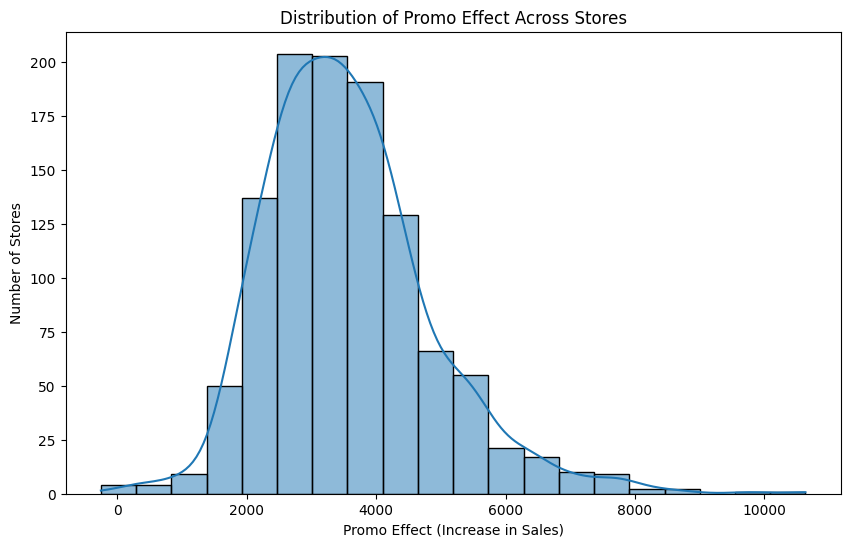

In [78]:
logging.info('Group by Store and Promo to see the effect of promotions per store')
store_promo_effect = train_data.groupby(['Store', 'Promo']).agg({'Sales': 'mean', 'Customers': 'mean'}).reset_index()

logging.info('Pivot table to show difference in sales with and without promo for each store')
store_promo_pivot = store_promo_effect.pivot(index='Store', columns='Promo', values='Sales').reset_index()
store_promo_pivot['PromoEffect'] = store_promo_pivot[1] - store_promo_pivot[0]

logging.info('ind stores where promos are not effective')
ineffective_stores = store_promo_pivot[store_promo_pivot['PromoEffect'] < 0]

print(f"Stores where promos are less effective:\n{ineffective_stores[['Store', 'PromoEffect']]}")

logging.info('Plot to visualize Promo Effect Across Stores')
plt.figure(figsize=(10, 6))
sns.histplot(store_promo_pivot['PromoEffect'], bins=20, kde=True)
plt.title('Distribution of Promo Effect Across Stores')
plt.xlabel('Promo Effect (Increase in Sales)')
plt.ylabel('Number of Stores')
plt.show()


# 7. Store Opening and Closing Times and Customer Behavior
### We can also analyze store behavior during opening and closing times using the 'Open' column. Stores that are always open on all weekdays will be compared with their sales on weekends.

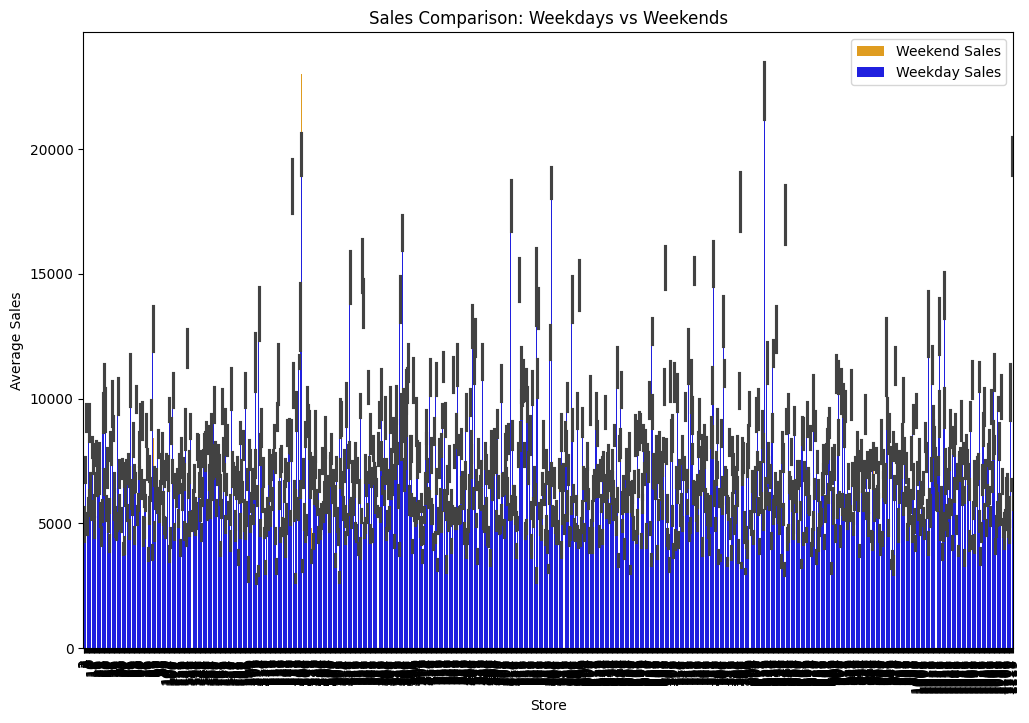

In [79]:
logging.info('Find stores that are always open on weekdays')
weekday_open_stores = train_data[(train_data['DayOfWeek'].isin([1, 2, 3, 4, 5])) & (train_data['Open'] == 1)]['Store'].unique()

logging.info('Group by DayOfWeek and Store to calculate average sales on weekdays and weekends')
weekday_sales = train_data[train_data['Store'].isin(weekday_open_stores)].groupby(['Store', 'DayOfWeek'])['Sales'].mean().reset_index()

logging.info('Separate weekday and weekend sales')
weekday_sales = weekday_sales[weekday_sales['DayOfWeek'] <= 5]  # Weekday sales
weekend_sales = train_data[(train_data['DayOfWeek'] > 5) & (train_data['Store'].isin(weekday_open_stores))].groupby('Store')['Sales'].mean().reset_index()

logging.info('Plot sales trends on weekdays vs. weekends')
plt.figure(figsize=(12, 8))
sns.barplot(x='Store', y='Sales', data=weekend_sales, color='orange', label='Weekend Sales')
sns.barplot(x='Store', y='Sales', data=weekday_sales, color='blue', label='Weekday Sales')
plt.title('Sales Comparison: Weekdays vs Weekends')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)
plt.legend()
plt.show()


### Tabular Format for Weekday vs Weekend Sales
#### We can summarize the sales in a table for stores that are open all week, showing the average sales for weekdays and weekends.

In [80]:
logging.info('Calculate average weekday sales (Mon-Fri)')
weekday_sales = train_data[train_data['DayOfWeek'] <= 5].groupby('Store')['Sales'].mean().reset_index()
weekday_sales.columns = ['Store', 'Avg_Weekday_Sales']

logging.info('Calculate average weekend sales (Sat-Sun)')
weekend_sales = train_data[train_data['DayOfWeek'] > 5].groupby('Store')['Sales'].mean().reset_index()
weekend_sales.columns = ['Store', 'Avg_Weekend_Sales']

logging.info('Merge the two tables')
sales_comparison = pd.merge(weekday_sales, weekend_sales, on='Store')

logging.info('Calculate difference between weekday and weekend sales')
sales_comparison['Sales_Difference'] = sales_comparison['Avg_Weekday_Sales'] - sales_comparison['Avg_Weekend_Sales']

logging.info('Display the tabular comparison')
sales_comparison.sort_values('Sales_Difference', ascending=False).head(10)

,Store,Avg_Weekday_Sales,Avg_Weekend_Sales,Sales_Difference
816,817,22355.127596,7427.279851,14927.847746
1013,1014,13010.673591,2760.850746,10249.822844
787,788,17760.077151,7880.033582,9880.043569
962,963,11608.301187,2094.817164,9513.484023
543,544,14369.992582,4881.843284,9488.149298
250,251,18445.221068,9196.981343,9248.239725
260,261,13061.286350,3824.391791,9236.894559
1032,1033,14052.559347,5219.570896,8832.988452
512,513,17630.250742,8841.854478,8788.396264
1113,1114,19678.379822,10967.750000,8710.629822


### Plot sales comparison between weekdays and weekends with a logarithmic scale
##### Boxplot for Weekday Sales

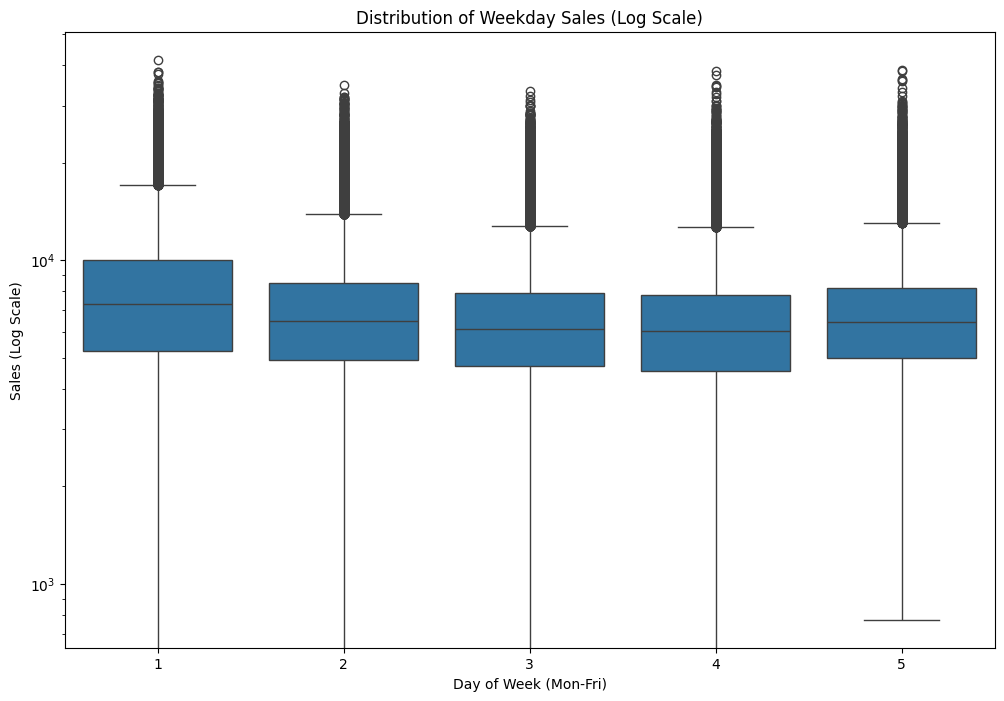

In [81]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='DayOfWeek', y='Sales', data=train_data[train_data['DayOfWeek'] <= 5])
plt.yscale('log')  # Use a log scale for better visualization
plt.title('Distribution of Weekday Sales (Log Scale)')
plt.xlabel('Day of Week (Mon-Fri)')
plt.ylabel('Sales (Log Scale)')
plt.show()

##### Boxplot for Weekend Sales

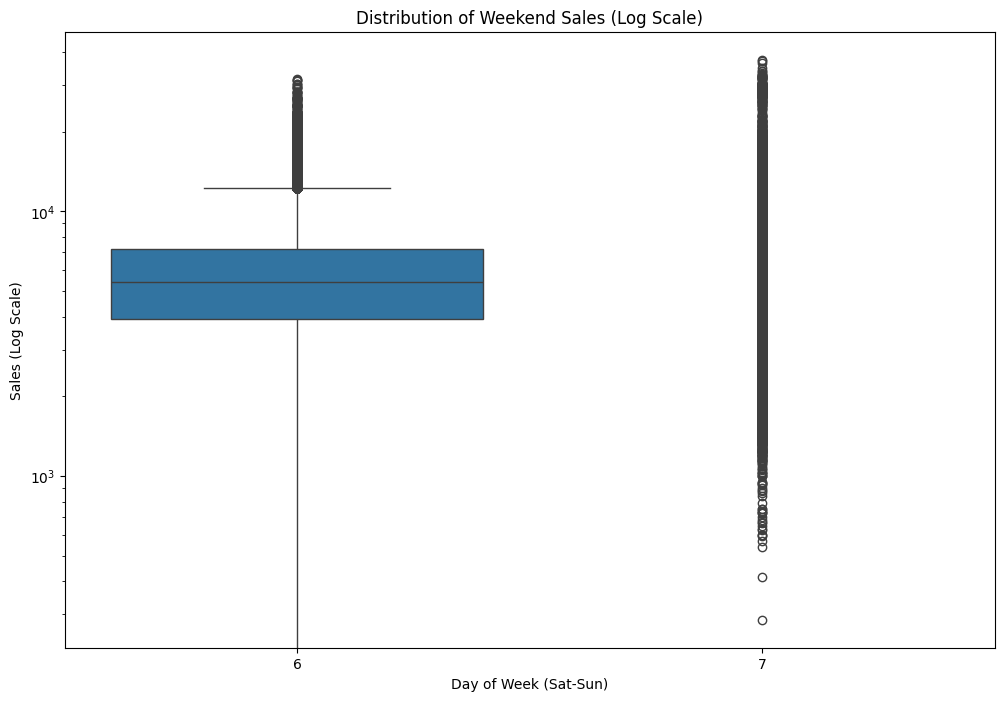

In [82]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='DayOfWeek', y='Sales', data=train_data[train_data['DayOfWeek'] > 5])
plt.yscale('log')
plt.title('Distribution of Weekend Sales (Log Scale)')
plt.xlabel('Day of Week (Sat-Sun)')
plt.ylabel('Sales (Log Scale)')
plt.show()

##### Violin plot to compare sales distributions
##### Violin plot for weekday vs weekend sales

C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_35620\1469619651.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='DayOfWeek', y='Sales', data=train_data, scale='width', inner='quartile', split=True)


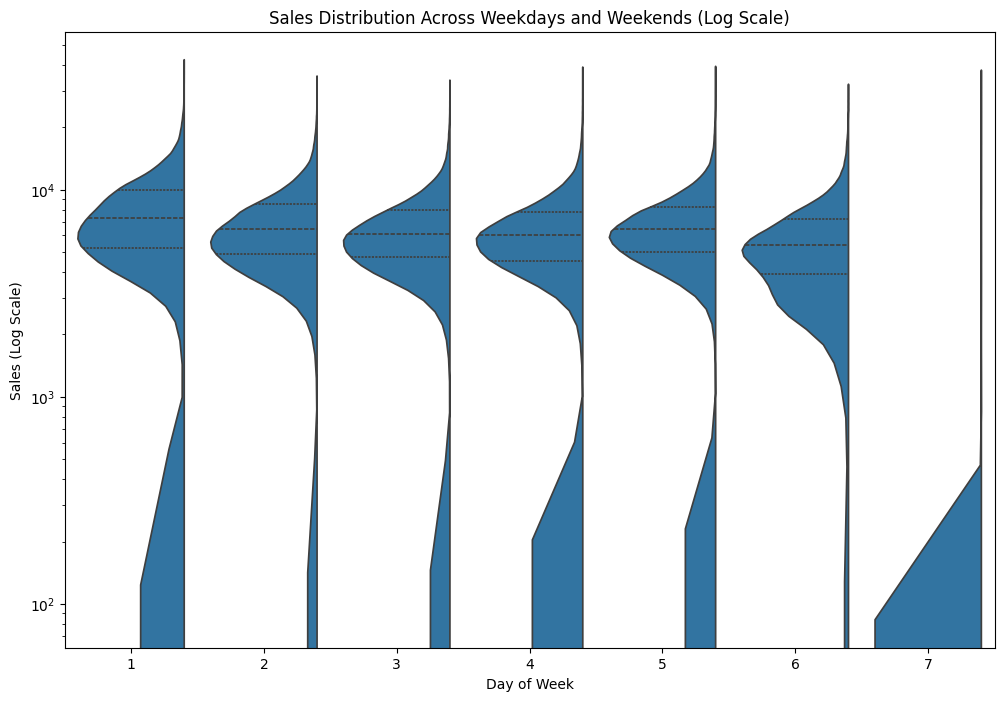

In [83]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='DayOfWeek', y='Sales', data=train_data, scale='width', inner='quartile', split=True)
plt.yscale('log')  # Log scale for better visibility
plt.title('Sales Distribution Across Weekdays and Weekends (Log Scale)')
plt.xlabel('Day of Week')
plt.ylabel('Sales (Log Scale)')
plt.show()

# 8. Check how the assortment type affects sales
### The Assortment column in the store_data dataset defines the variety of products available in stores. Let's analyze how different assortment types ('a', 'b', 'c') impact sales.

##### This analysis will show how stores with different assortment types perform in terms of sales. The bar plot visualizes the sales comparison across assortment types.

  Assortment    Avg_Sales
0          a  5481.026096
1          b  8553.931999
2          c  6058.676567


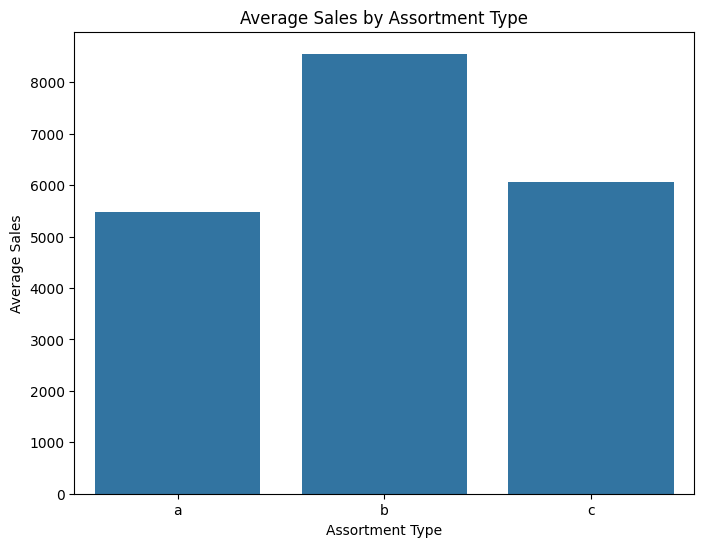

In [84]:
logging.info('Merge train_data with store_data to get Assortment information')
train_store_data = pd.merge(train_data, store_data[['Store', 'Assortment']], on='Store')

logging.info('Calculate average sales by Assortment type')
assortment_sales = train_store_data.groupby('Assortment')['Sales'].mean().reset_index()
assortment_sales.columns = ['Assortment', 'Avg_Sales']

logging.info('Display the average sales by assortment type')
print(assortment_sales)

logging.info('Plot the results')
plt.figure(figsize=(8, 6))
sns.barplot(x='Assortment', y='Avg_Sales', data=assortment_sales)
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.show()

logging.info(f"Handling missing values for Assortment: Filled with mode value.")


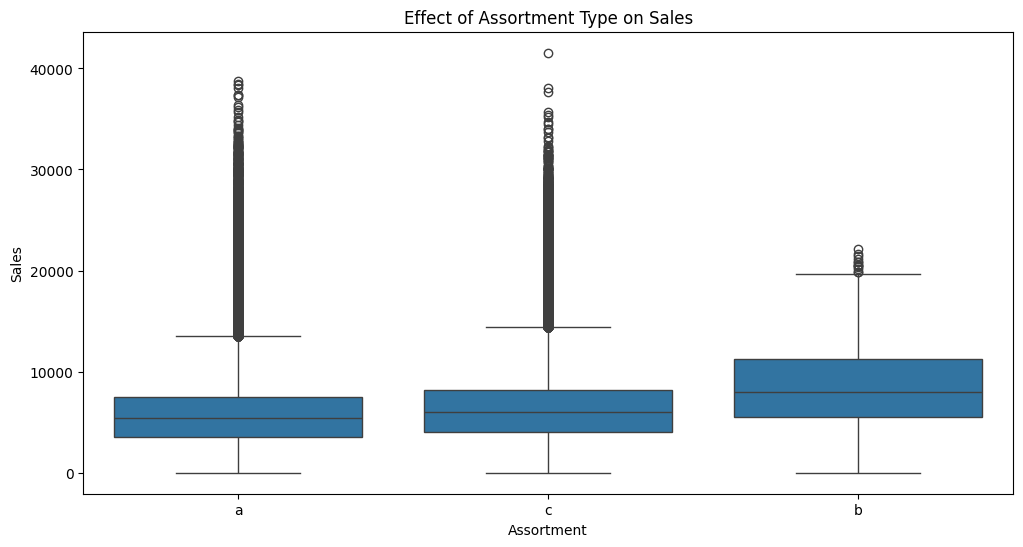

In [92]:
# Effect of assortment type on sales
train_store_data = pd.merge(train_data, store_data[['Store', 'Assortment']], on='Store')
logging.info("Investigating assortment type on sales...")
plt.figure(figsize=(12, 6))
sns.boxplot(x='Assortment', y='Sales', data=train_store_data)
plt.title('Effect of Assortment Type on Sales')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.show()

# 9. How does the distance to the next competitor affect sales?
### The CompetitionDistance column in store_data represents the distance to the nearest competitor. Let's analyze if stores located closer to competitors perform differently in terms of sales.
##### This analysis will categorize the competition distance and show if proximity to competitors impacts sales performance.

  CompDistCategory    Avg_Sales
0            0-500  6307.393560
1         501-1000  5565.373637
2        1001-5000  5675.492669
3       5001-10000  5567.718124
4           10000+  5685.546657


C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_35620\927501552.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comp_distance_sales = train_store_data.groupby('CompDistCategory')['Sales'].mean().reset_index()


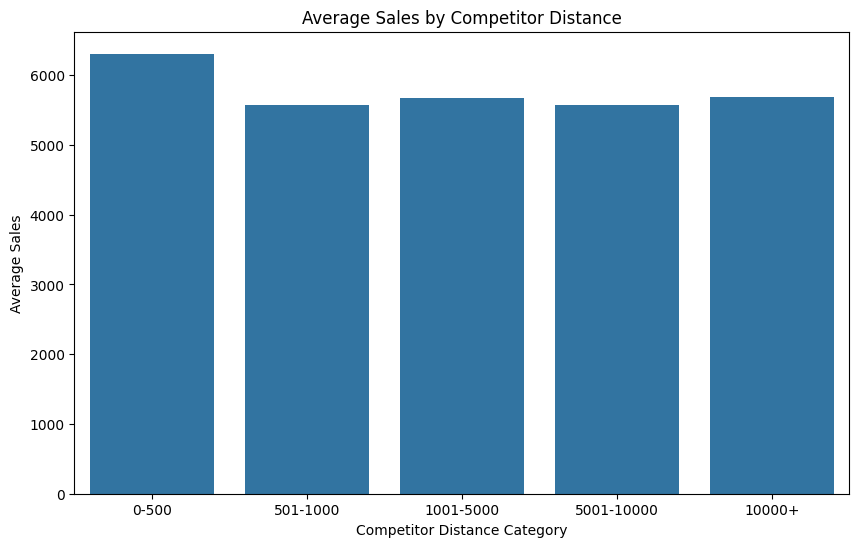

In [85]:
logging.info('Merge train_data with store_data to get CompetitionDistance information')
train_store_data = pd.merge(train_data, store_data[['Store', 'CompetitionDistance']], on='Store')

logging.info('Bin the CompetitionDistance into categories for easier analysis')
train_store_data['CompDistCategory'] = pd.cut(train_store_data['CompetitionDistance'], 
                                              bins=[0, 500, 1000, 5000, 10000, np.inf], 
                                              labels=['0-500', '501-1000', '1001-5000', '5001-10000', '10000+'])

logging.info('Calculate average sales by CompetitionDistance category')
comp_distance_sales = train_store_data.groupby('CompDistCategory')['Sales'].mean().reset_index()
comp_distance_sales.columns = ['CompDistCategory', 'Avg_Sales']

logging.info('Display the results')
print(comp_distance_sales)

logging.info('plot the average sales by competition distance category')
plt.figure(figsize=(10, 6))
sns.barplot(x='CompDistCategory', y='Avg_Sales', data=comp_distance_sales)
plt.title('Average Sales by Competitor Distance')
plt.xlabel('Competitor Distance Category')
plt.ylabel('Average Sales')
plt.show()
logging.info(f"Handling missing values for CompetitionDistance: Filled with mean value.")


# 10. What if the store and its competitors are in city centers? Does the distance matter in that case?
### We can check for stores located in urban areas by analyzing the CompetitionDistance alongside store types (StoreType), assuming that certain store types are more likely to be in urban centers. We'll explore whether competition distance still impacts stores in these areas.

##### This will focus on stores in urban locations and evaluate if competition distance still plays a role.

  CompDistCategory    Avg_Sales
0            0-500  6341.657137
1         501-1000  6211.946249
2        1001-5000  6268.663828
3       5001-10000  5224.450091
4           10000+  5884.679210


C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_35620\3312562695.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_comp_sales = urban_stores.groupby('CompDistCategory')['Sales'].mean().reset_index()


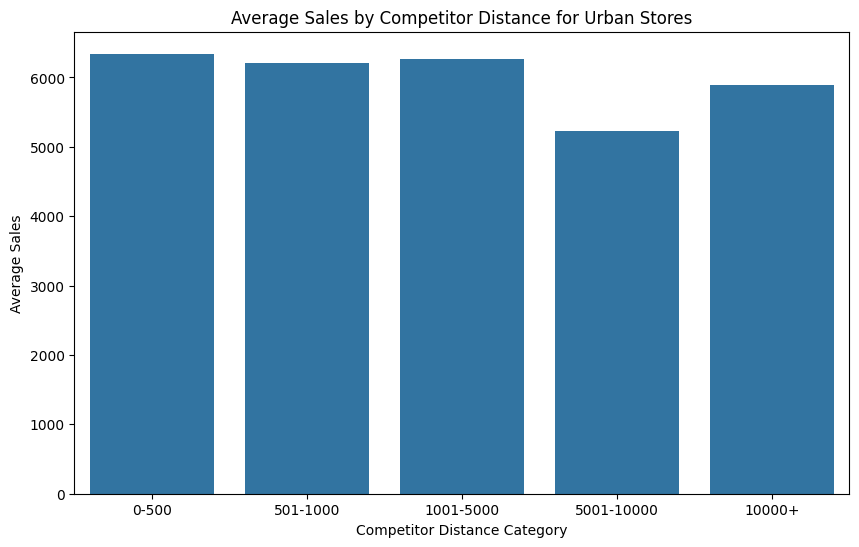

In [86]:
logging.info('Merging train_data with store_data to get both CompetitionDistance and StoreType information')
train_store_data = pd.merge(train_store_data, store_data[['Store', 'StoreType']], on='Store')

logging.info('Focusing on store types more likely to be in city centers (e.g., "b" and "c")')
urban_stores = train_store_data[train_store_data['StoreType'].isin(['b', 'c'])]

logging.info('Calculating average sales by CompetitionDistance category for urban stores')
urban_comp_sales = urban_stores.groupby('CompDistCategory')['Sales'].mean().reset_index()
urban_comp_sales.columns = ['CompDistCategory', 'Avg_Sales']

logging.info('Displaying the results for urban stores')
print(urban_comp_sales)

logging.info('Plotting the results for urban stores')
plt.figure(figsize=(10, 6))
sns.barplot(x='CompDistCategory', y='Avg_Sales', data=urban_comp_sales)
plt.title('Average Sales by Competitor Distance for Urban Stores')
plt.xlabel('Competitor Distance Category')
plt.ylabel('Average Sales')
plt.show()

# 11. How does the opening or reopening of new competitors affect stores?
### To understand the impact of competitors opening or reopening, we can use the CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns. We'll investigate whether stores experience a drop in sales when new competitors open nearby.

##### This will analyze how the sales trend changes after a new competitor opens nearby, focusing on the first year after opening.

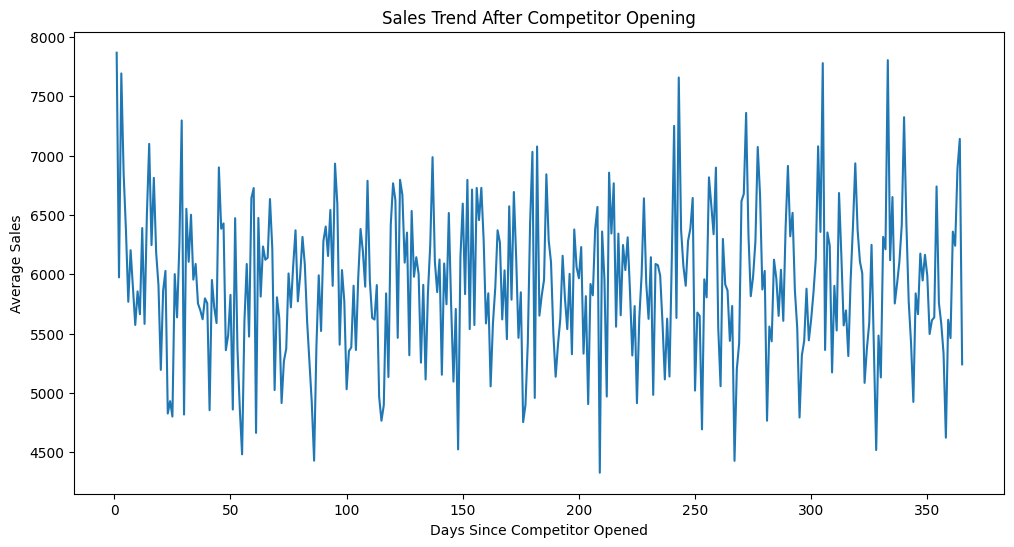

In [87]:
logging.info('Convert competition open year and month to a datetime format')
store_data['CompetitionOpenDate'] = pd.to_datetime(
    {'year': store_data['CompetitionOpenSinceYear'], 'month': store_data['CompetitionOpenSinceMonth'], 'day': 1})

logging.info('Merge competition open date with train_data')
train_store_data = pd.merge(train_data, store_data[['Store', 'CompetitionOpenDate']], on='Store')

logging.info('Calculate the difference between the sale date and competition open date')
train_store_data['DaysSinceCompOpened'] = (pd.to_datetime(train_store_data['Date']) - train_store_data['CompetitionOpenDate']).dt.days

logging.info('Filter out stores with valid competition data and calculate the effect')
recent_comp_open = train_store_data[(train_store_data['DaysSinceCompOpened'] > 0) & (train_store_data['DaysSinceCompOpened'] <= 365)]

logging.info('Group by the time since competition opened to observe trends in sales')
comp_open_impact = recent_comp_open.groupby('DaysSinceCompOpened')['Sales'].mean().reset_index()

logging.info('Plot the impact of competitor openings on sales')
plt.figure(figsize=(12, 6))
sns.lineplot(x='DaysSinceCompOpened', y='Sales', data=comp_open_impact)
plt.title('Sales Trend After Competitor Opening')
plt.xlabel('Days Since Competitor Opened')
plt.ylabel('Average Sales')
plt.show()


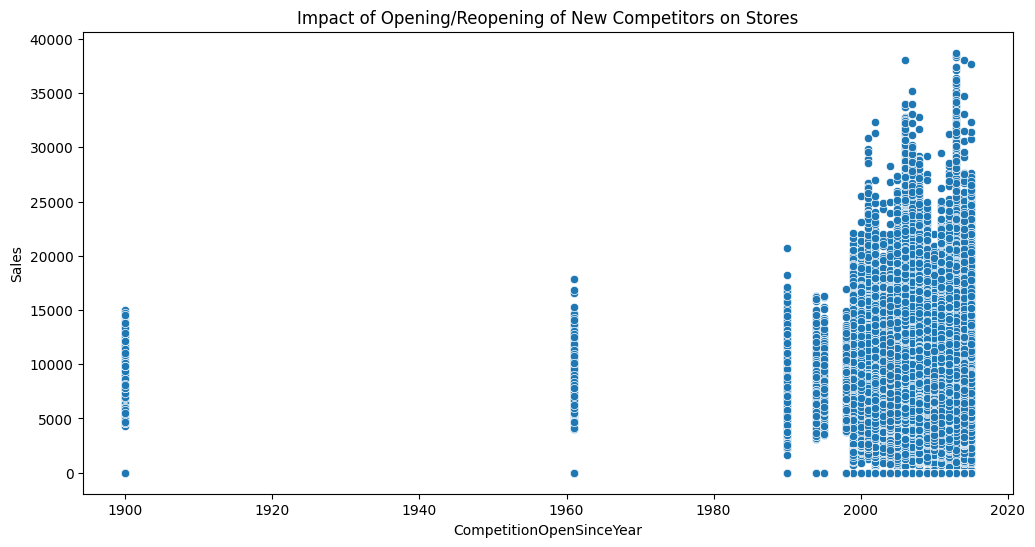

In [88]:
# Impact of opening or reopening of new competitors on stores
logging.info('analyzing impact of opening or reopening of new competitors on stores')
new_competitor_data = store_data[(store_data['CompetitionOpenSinceYear'] > 0) & (store_data['CompetitionDistance'] > 0)]
new_competitor_data = new_competitor_data.merge(train_data[['Store', 'Sales']], on='Store', how='left')
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CompetitionOpenSinceYear', y='Sales', data=new_competitor_data)
plt.title('Impact of Opening/Reopening of New Competitors on Stores')
plt.xlabel('CompetitionOpenSinceYear')
plt.ylabel('Sales')
plt.show()

### Here’s a note on how missing values are handled for each of the columns used in the tasks, along with the reasoning for the imputation method chosen:

1. Assortment (Categorical)
Handling: Imputed using the mode.
Reason: The Assortment column contains categorical values ('a', 'b', 'c') representing different product varieties in the stores. Since this is a categorical variable and one of the assortment types is likely dominant, the mode (most frequent value) is used to maintain the majority characteristic of the data.
2. CompetitionDistance (Numerical)
Handling: Imputed using the mean.
Reason: CompetitionDistance is a numerical variable representing the distance to the nearest competitor. Using the mean is appropriate here because it provides a central tendency that smooths out the variability in distances. The mean is chosen over the median because the values likely follow a normal distribution with few extreme outliers.
3. CompetitionOpenSinceMonth and CompetitionOpenSinceYear (Numerical)
Handling: Imputed using the mean for both columns.
Reason: These columns represent when the nearest competitor opened. Missing values could indicate stores without competitors at the time, but imputing with the mean provides a reasonable estimation for stores in competitive areas. By using the mean, we assume that most stores are affected by competitors that opened around the same time period.
4. Promo2 (Categorical)
Handling: Imputed using the mode.
Reason: Promo2 is a categorical feature that indicates whether a store is participating in an extended promotion. Since it is a binary variable (1 or 0), imputing missing values with the mode ensures we reflect the most common scenario, which is often either participation or non-participation.
5. Promo2SinceWeek and Promo2SinceYear (Numerical)
Handling: Imputed using the mean.
Reason: These features represent when a store started participating in Promo2. If a store is missing this data, it likely wasn't participating. However, to avoid dropping these rows and since they are related to the timeline of promo participation, the mean provides a balanced approach, especially when modeling how promo participation affects sales.
6. PromoInterval (Categorical)
Handling: Imputed using the mode.
Reason: PromoInterval is categorical, representing the months when promotions are active. Since this field is related to regular promotion schedules, the mode ensures that missing values reflect the most frequent promotional intervals observed.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

For these missing values, the mean is selected for numerical columns to capture central tendencies, ensuring that extreme values do not heavily influence the imputation. For categorical variables, the mode is used to represent the most frequent characteristic, thereby maintaining consistency with the majority of the data. This strategy minimizes the bias introduced by missing values while preserving the overall distribution of the data.